<a href="https://colab.research.google.com/github/sekarisme/portofolio/blob/master/Sekar_Individual_Assignment_16_Nov_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import shutil
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
pd.set_option('float_format', '{:,.2f}'.format)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Pakistan Largest Ecommerce Dataset.csv to Pakistan Largest Ecommerce Dataset.csv


In [5]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Pakistan Largest Ecommerce Dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

<ipython-input-5-b9fded2361b1>:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(io.BytesIO(uploaded['Pakistan Largest Ecommerce Dataset.csv']))


In [6]:
df2.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,"211,131.00",complete,7/1/2016,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,...,7.00,2016-7,7-2016,FY17,1.00,NaN,NaN,NaN,NaN,NaN
1,"211,133.00",canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,...,7.00,2016-7,7-2016,FY17,2.00,NaN,NaN,NaN,NaN,NaN
2,"211,134.00",canceled,7/1/2016,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,...,7.00,2016-7,7-2016,FY17,3.00,NaN,NaN,NaN,NaN,NaN
3,"211,135.00",complete,7/1/2016,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,...,7.00,2016-7,7-2016,FY17,4.00,NaN,NaN,NaN,NaN,NaN
4,"211,136.00",order_refunded,7/1/2016,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,...,7.00,2016-7,7-2016,FY17,5.00,NaN,NaN,NaN,NaN,NaN


In [7]:
df2 = df2.dropna(how='all', axis=1)

###Data Statistics

In [9]:
df2.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,"584,524.00","584,524.00","584,524.00","584,524.00","584,524.00","584,524.00","584,524.00","584,513.00"
mean,"565,667.07","6,348.75",1.30,"8,530.62",499.49,"2,017.04",7.17,"45,790.51"
std,"200,121.17","14,949.27",4.00,"61,320.81","1,506.94",0.71,3.49,"34,414.96"
min,"211,131.00",0.00,1.00,"-1,594.00",-599.50,"2,016.00",1.00,1.00
25%,"395,000.75",360.00,1.00,945.00,0.00,"2,017.00",4.00,"13,516.00"
50%,"568,424.50",899.00,1.00,"1,960.40",0.00,"2,017.00",7.00,"42,856.00"
75%,"739,106.25","4,070.00",1.00,"6,999.00",160.50,"2,018.00",11.00,"73,536.00"
max,"905,208.00","1,012,625.90","1,000.00","17,888,000.00","90,300.00","2,018.00",12.00,"115,326.00"


Insights:

The minimum value of grand total is negative which can't be true

###Grand Total
Let's investigate the grand total to find the reasons for the negative values. Lets check if the negative grand total corresponds to the canceled or refunded orders

In [10]:
import matplotlib.style as style

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

<ipython-input-10-c5f0b62dd846>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


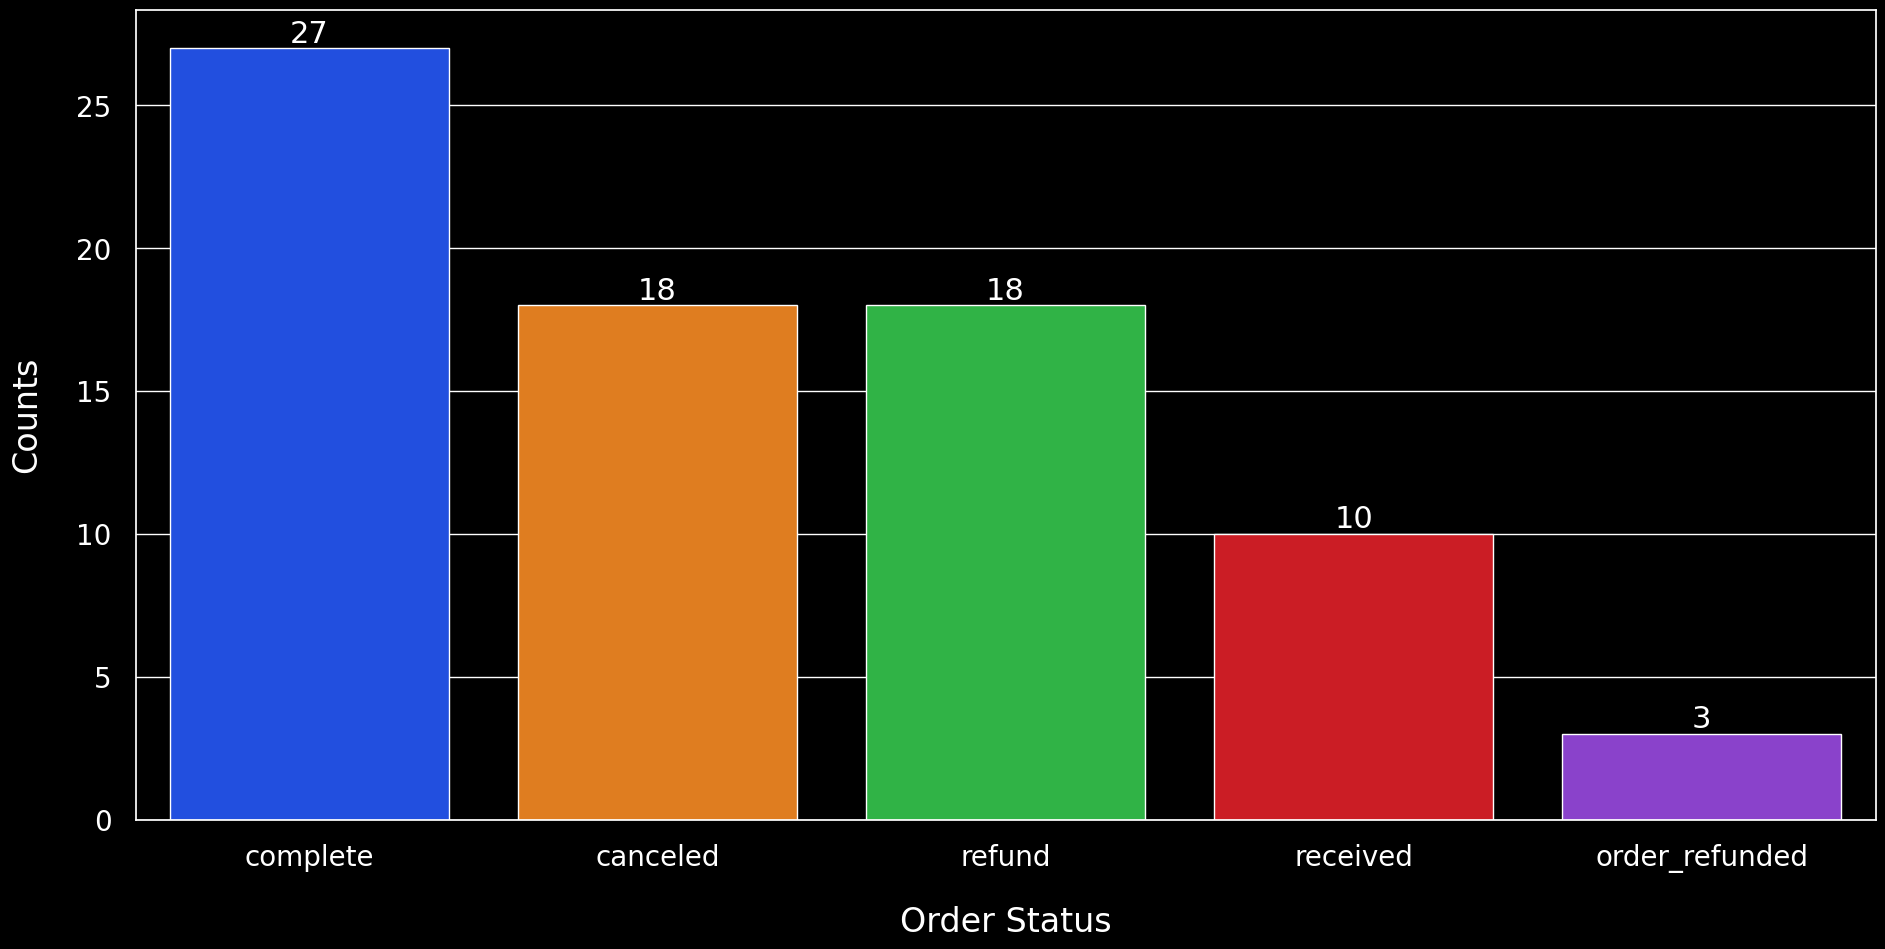

In [11]:
total = df2[df2.grand_total < 0].status.value_counts().to_dict()

total_df = pd.DataFrame(list(total.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(20,10))
ax = sns.barplot(data=total_df, x='Order Status', y='Counts', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

Insights:

Transactions with negative grand total are not only the canceled and refunded orders but some completed orders also have negative grand total, so we will drop these rows from the data

In [12]:
df2 = df2[df2.grand_total > 0]

###Order STatus
Let' explore the status column to check the different categories of the order statuses

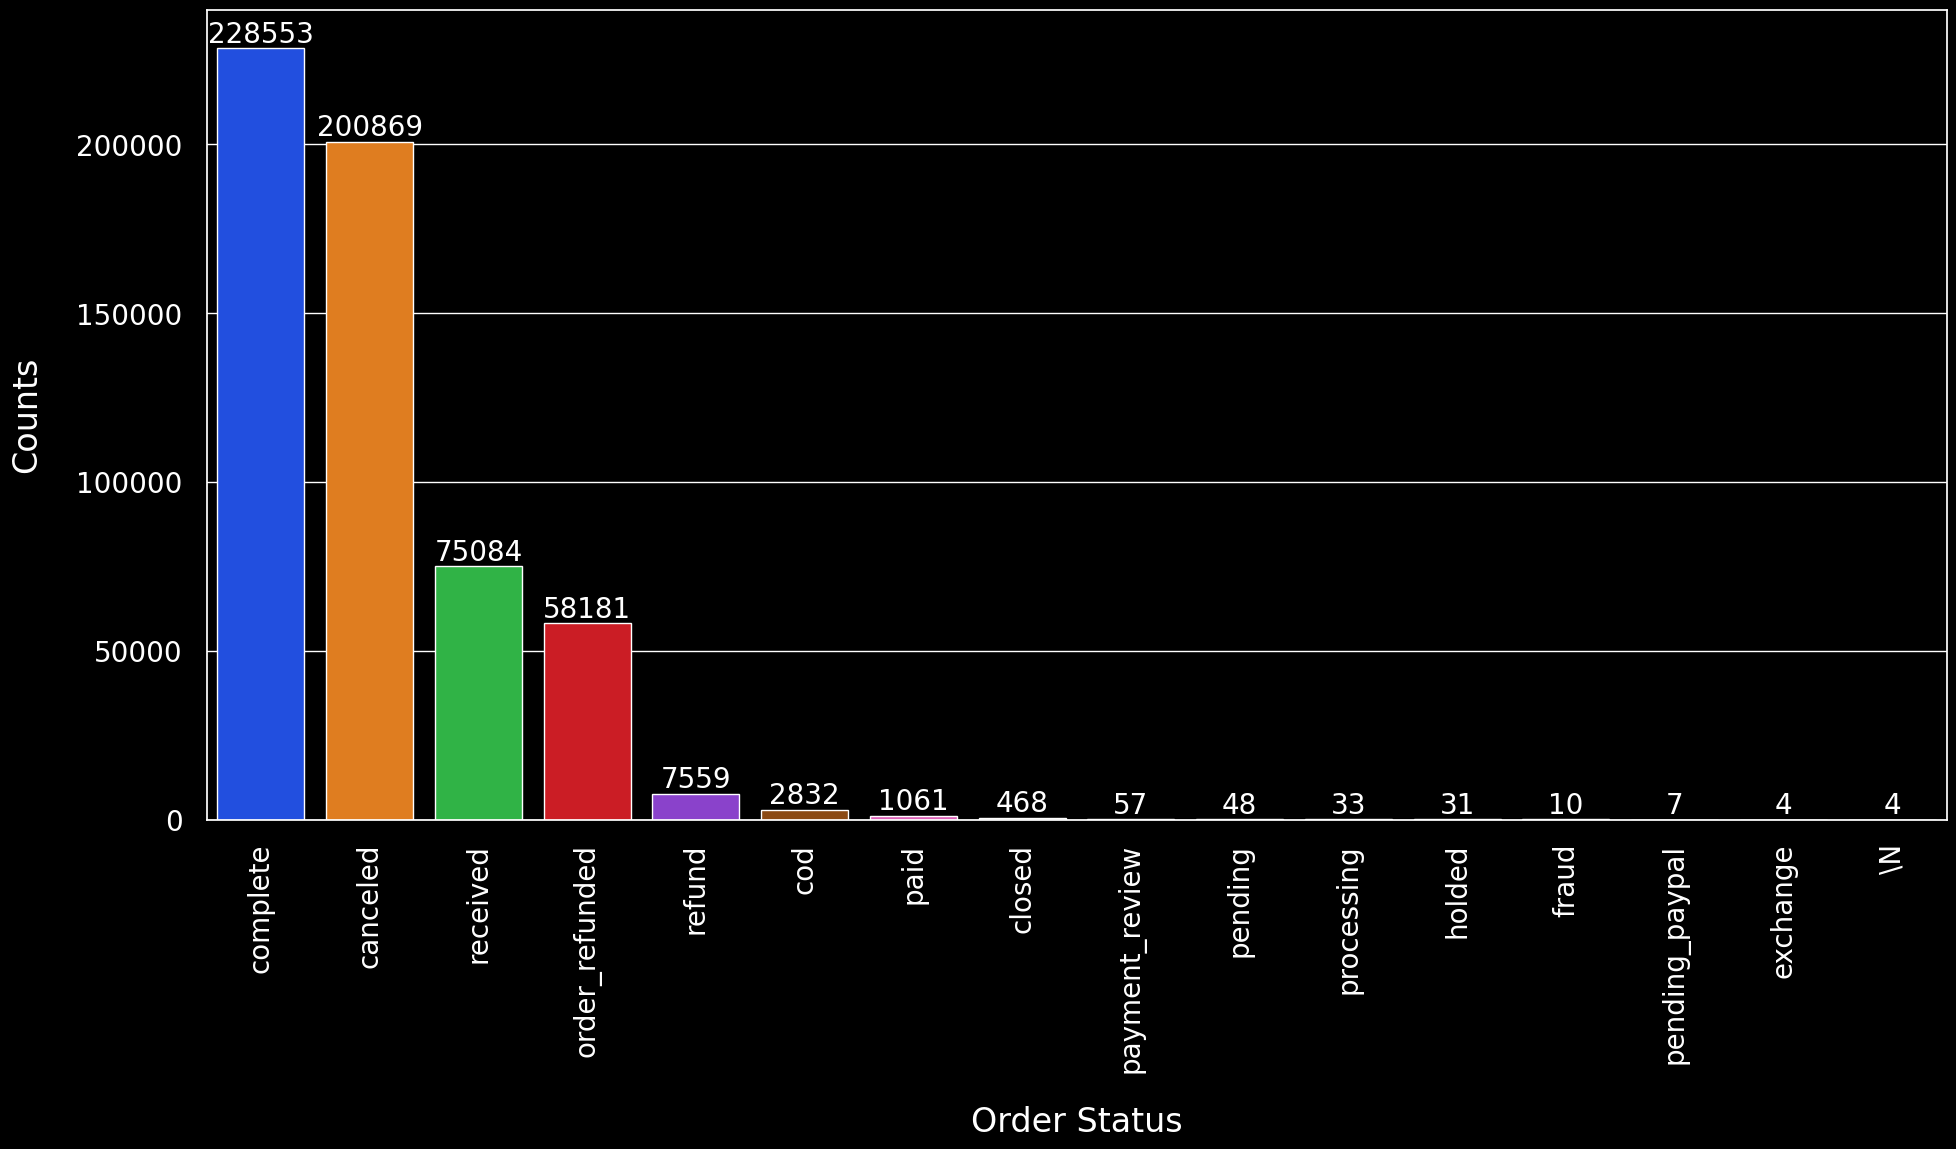

In [13]:
plt.figure(figsize=(20,10))

status = df2.status.value_counts()
status_df = pd.DataFrame(list(status.items()), columns=['Order Status', 'Counts'])

ax = sns.barplot(data = status_df, x= 'Order Status', y = "Counts", palette = "bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

Insights:

Some of these are similar in meaning, so we can group them under the same categories

###Grouping of Order Status

In [14]:
df2.status = df2.status.replace({'complete': 'Completed',
                                             'received': 'Completed',
                                             'cod': 'Completed',
                                             'paid': 'Completed',
                                             'closed': 'Completed',
                                             'exchange': 'Completed',
                                             'canceled': 'Canceled',
                                             'order_refunded': 'Canceled',
                                             'refund': 'Canceled',
                                             'fraud': 'Canceled',
                                             'payment_review': 'Pending',
                                             'pending': 'Pending',
                                             'processing': 'Pending',
                                             'holded': 'Pending',
                                             'pending_paypal': 'Pending'})

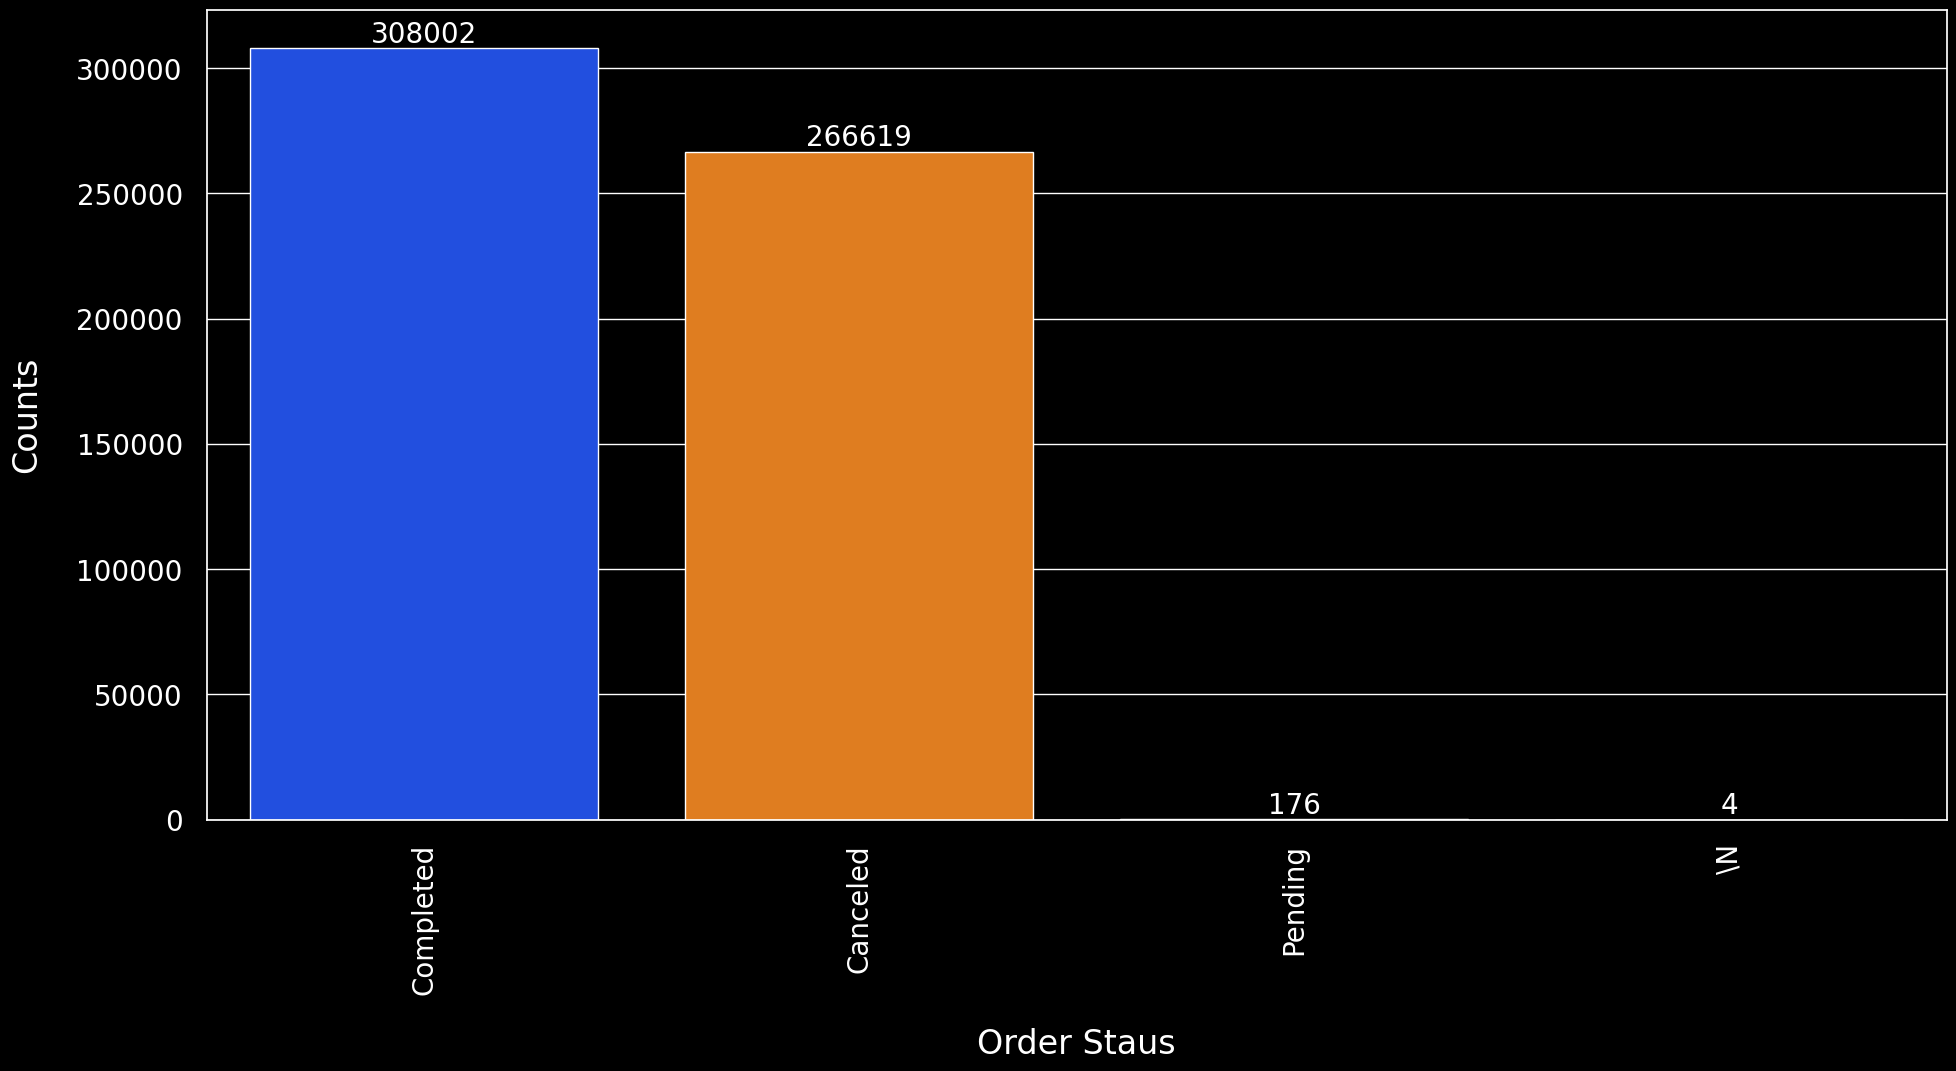

In [15]:
status_updated = df2.status.value_counts()

status_updated_df = pd.DataFrame(list(status_updated.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(20,10))
ax = sns.barplot(data=status_updated_df, x='Order Status', y='Counts', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Order Staus', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

Insights:

We will drop Canceled and /N orders as we only want to investigate Completed or In process orders

In [17]:
canceled = df2[df2.status == 'Canceled']

###Dropping Canceled Orders

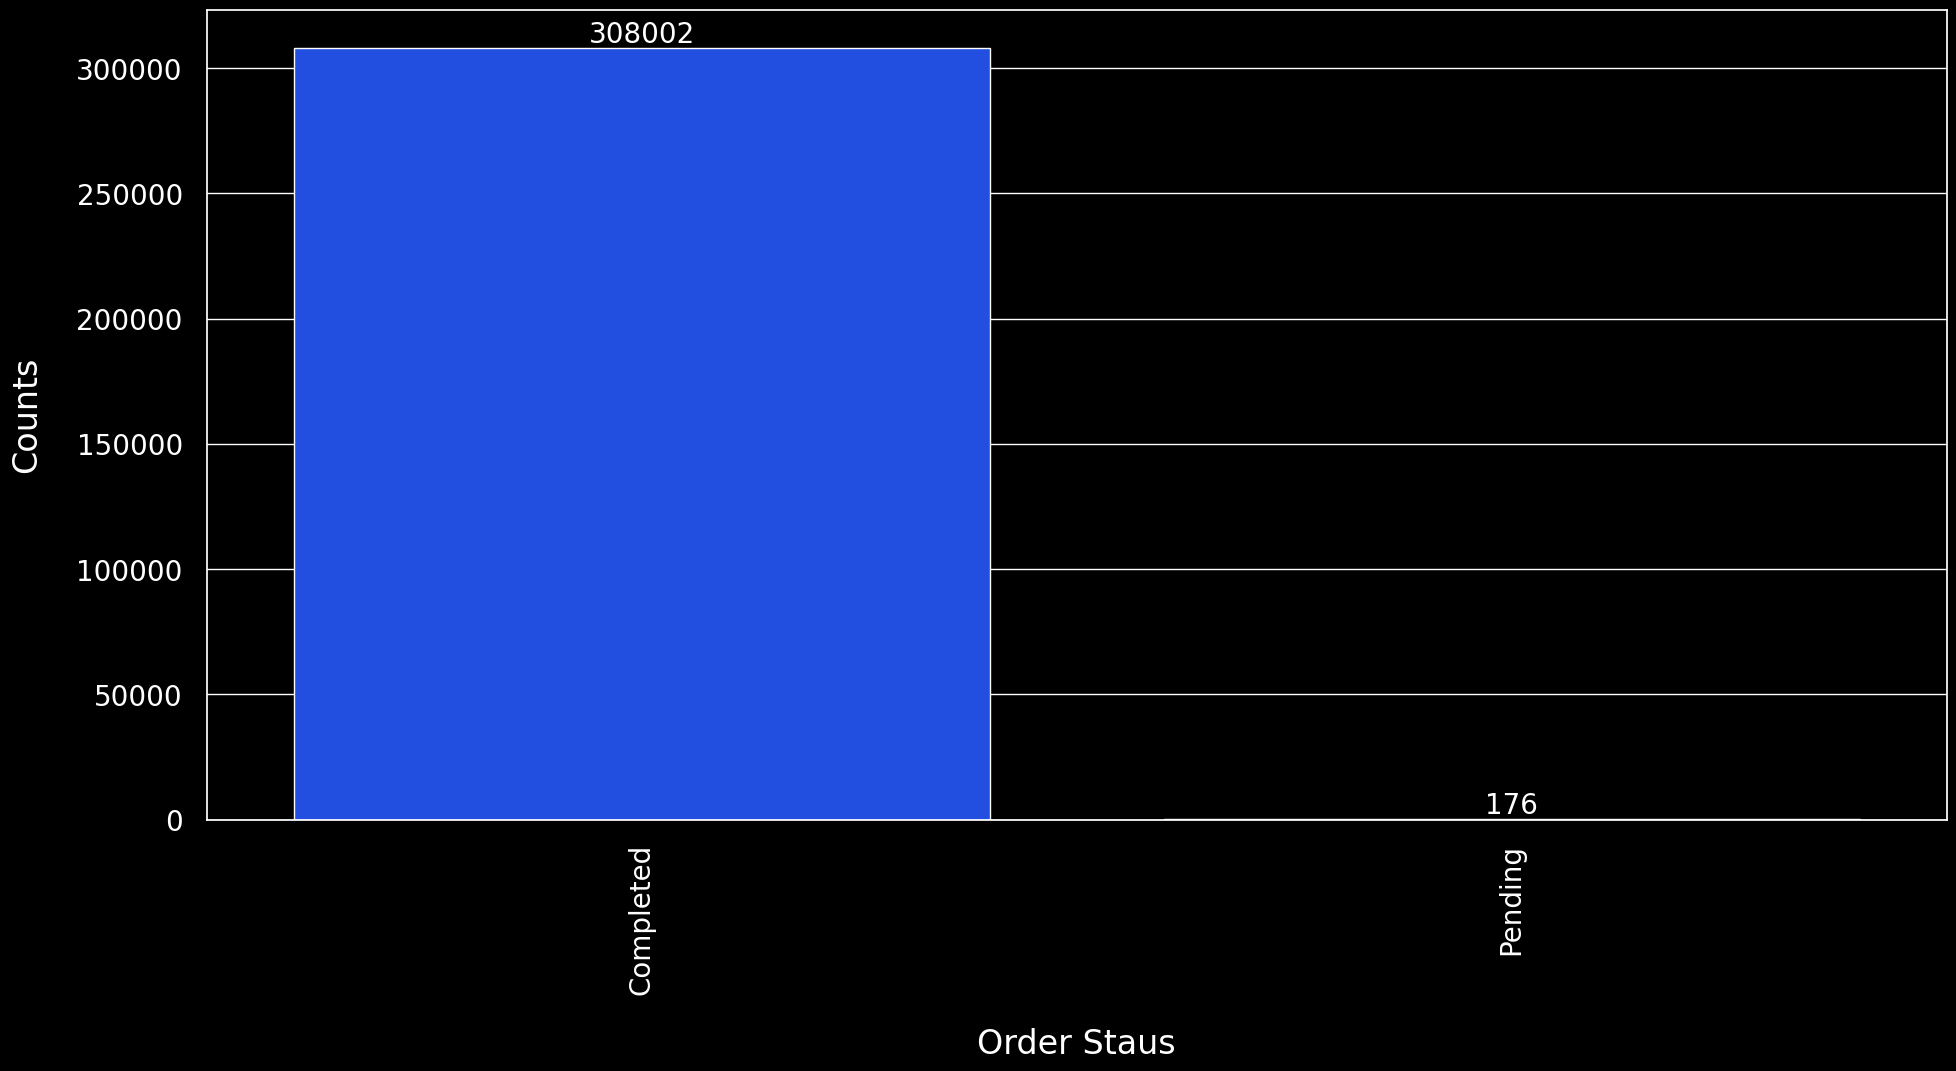

In [18]:
df2 = df2[(df2.status == 'Completed') | (df2.status == 'Pending')]
status_updated = df2.status.value_counts()

status_updated_df = pd.DataFrame(list(status_updated.items()), columns=['Order Status', 'Counts'])

plt.figure(figsize=(20,10))
ax = sns.barplot(data=status_updated_df, x='Order Status', y='Counts', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Order Staus', fontsize=24, labelpad=24, color='white')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='white');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

###Missing Values

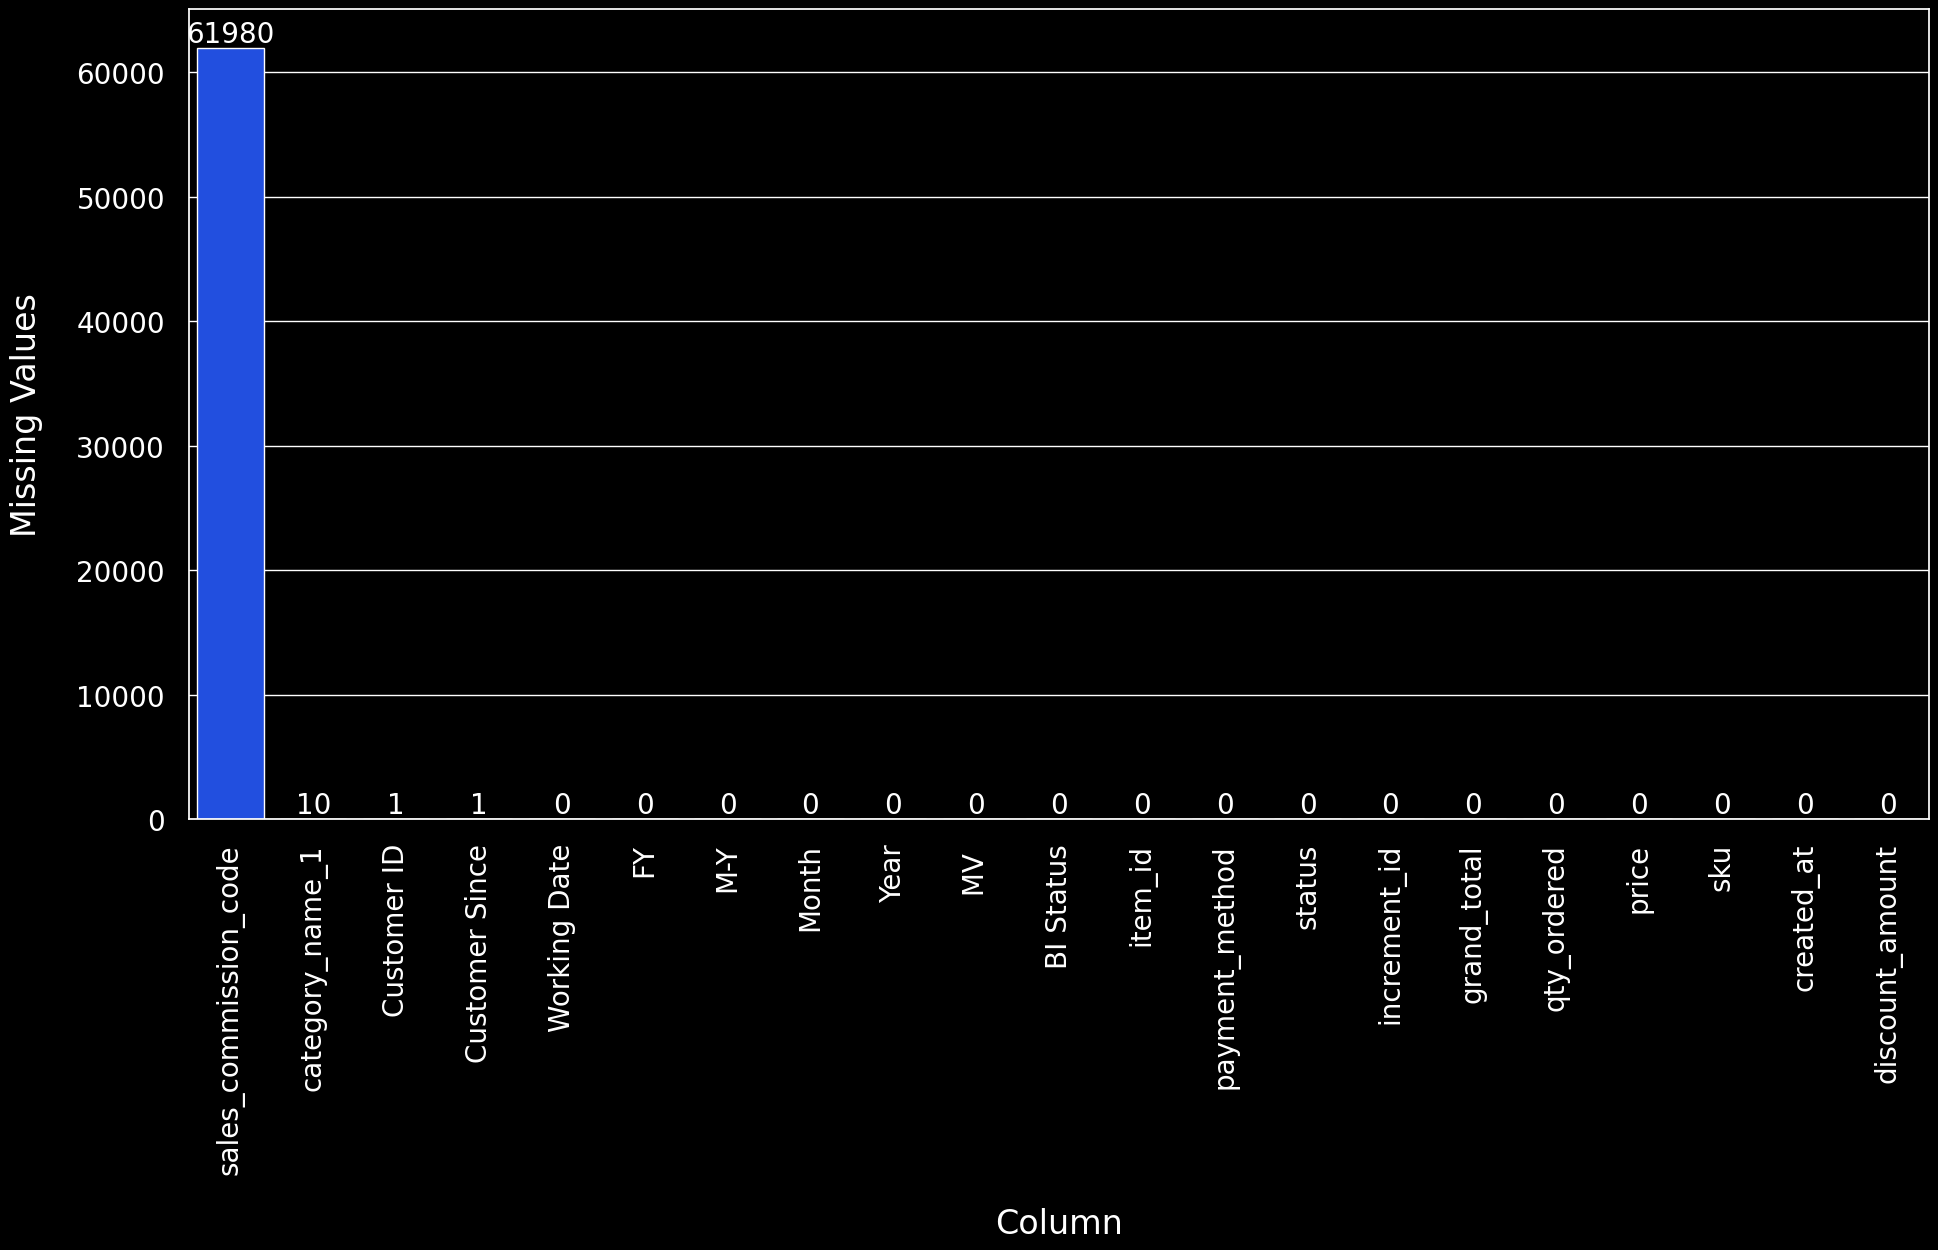

In [19]:
missing_values = df2.isna().sum().sort_values(ascending=False)

missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=missing_values_df, x = 'Column', y = 'Missing_Values', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
ax.set_xlabel('Column', fontsize=24, labelpad=24, color='white')
ax.set_ylabel('Missing Values', fontsize=24, labelpad=24, color='white');
plt.xticks(rotation=90, ha='center');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

Insights:

sales_commission_code column has lot of missing values. We will drop this column from the data as this is not required for our analysis
After that we will drop the rows with NAN values

In [20]:
df2 = df2.drop(['created_at', 'sku', 'sales_commission_code', 'Customer Since', 'M-Y'], axis=1)

df2 = df2.dropna()

##Preliminary Investigations

###Canceled orders

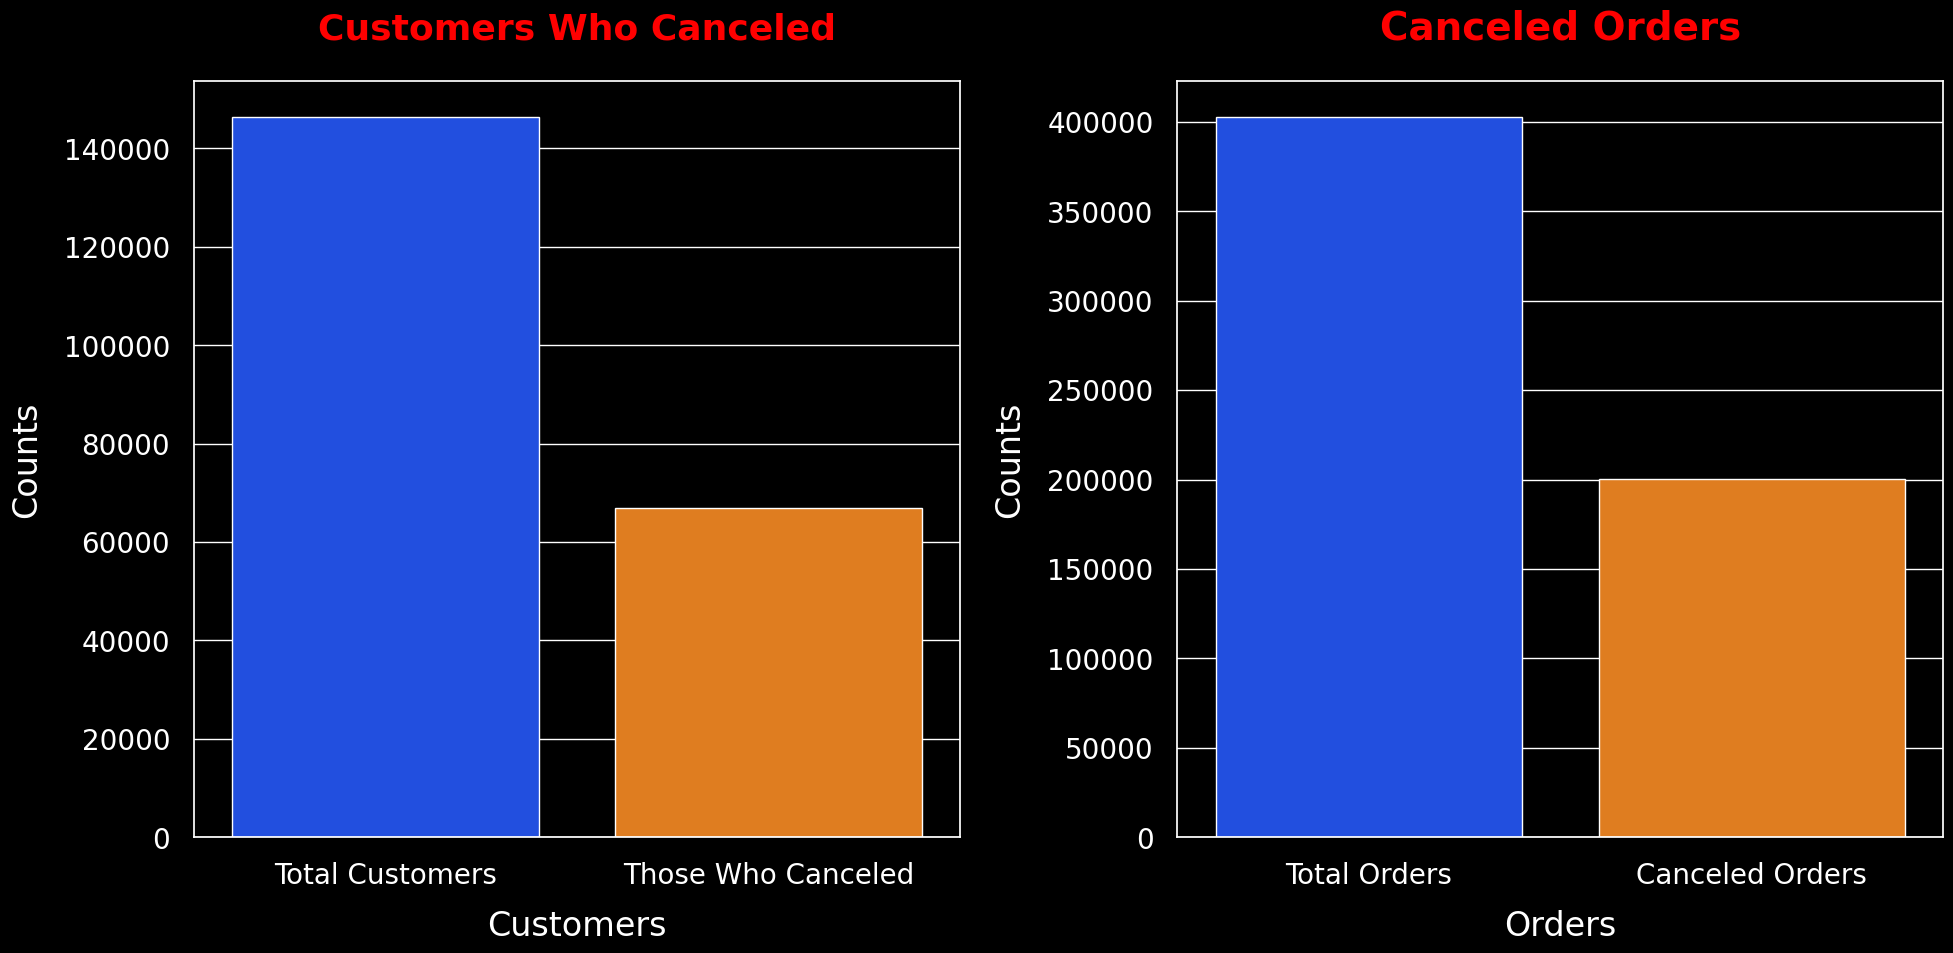

In [27]:
a = df2['Customer ID'].nunique() + canceled ['Customer ID'].nunique()
b = canceled ['Customer ID'].nunique()

data = {'Customers': ['Total Customers', 'Those Who Canceled'], 'Customer_Counts': [a, b]}

customer_counts = pd.DataFrame.from_dict(data)


c = df2['increment_id'].nunique() + canceled ['increment_id'].nunique()
d = canceled ['increment_id'].nunique()

data = {'Orders': ['Total Orders', 'Canceled Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(ax = ax[0], data = customer_counts, x=customer_counts.Customers, y=customer_counts.Customer_Counts, palette= 'bright')
sns.barplot(ax = ax[1], data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette= 'bright')

ax[0].set_title("Customers Who Canceled", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0].set_xlabel("Customers", fontsize = 24, labelpad = 15, color='white')
ax[0].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[0].tick_params(axis='x', colors='white', labelsize=20)
ax[0].tick_params(axis='y', colors='white', labelsize=20)


ax[1].set_title("Canceled Orders", fontsize = 28, pad = 30, color='red', fontweight='bold')
ax[1].set_xlabel("Orders", fontsize = 24, labelpad = 15, color='white')
ax[1].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='white')
ax[1].tick_params(axis='x', colors='white', labelsize=20)
ax[1].tick_params(axis='y', colors='white', labelsize=20);

plt.tight_layout(pad=2);

Insights:

45% of the customers canceled their orders
50 % of the orders were canceled

##Famous category: canceled orders

In [29]:
import plotly.express as px

canceled = canceled.dropna()
fig = px.treemap(canceled,
                 path=['category_name_1'], template='plotly_dark')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

Insights:

Most of the orders were canceled from Mobile & tablets, Men's Fashion and Appliances

###Orders per customers

In [30]:
number_of_orders = df2.groupby('Customer ID')['increment_id'].nunique().sort_values(ascending=False)

number_of_orders_df = pd.DataFrame(list(number_of_orders.items()), columns=['Customer ID', 'Number of Orders'])

a = number_of_orders_df[number_of_orders_df['Number of Orders'] == 1].value_counts().sum()
b = number_of_orders_df[number_of_orders_df['Number of Orders'] != 1].value_counts().sum()


data = {'Order': ['One Order', 'More than One Order'], 'Customer_Counts': [a, b]}

order_counts = pd.DataFrame.from_dict(data)

fig = px.pie(order_counts,
             values = order_counts.Customer_Counts,
             names = order_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

Insights:

About 2/3rd of customers have only one order while 1/3rd of customers have placed more than one orders

###Orders per category

In [31]:
number_of_prod = df2.groupby('Customer ID')['category_name_1'].nunique().sort_values(ascending=False)

number_of_prod_df = pd.DataFrame(list(number_of_prod.items()), columns=['Customer ID', 'Number of Products'])

a = number_of_prod_df[number_of_prod_df['Number of Products'] == 1].value_counts().sum()
b = number_of_prod_df[number_of_prod_df['Number of Products'] != 1].value_counts().sum()

data = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data)

fig = px.pie(category_counts,
             values = category_counts.Customer_Counts,
             names = category_counts.Order,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

Insights:

About 72% of customers bought products from only one category while 28% purchased products from more than one categories

##RFM Modelling
RFM (Recency, Frequency, Monetary) is the method to segment the customers into different clusters based on their past purchasing behavior. Companies often deploy this to get to know their customers well. This helps them to respond to the ever changing customers requirement timely and plan better and effective strategy

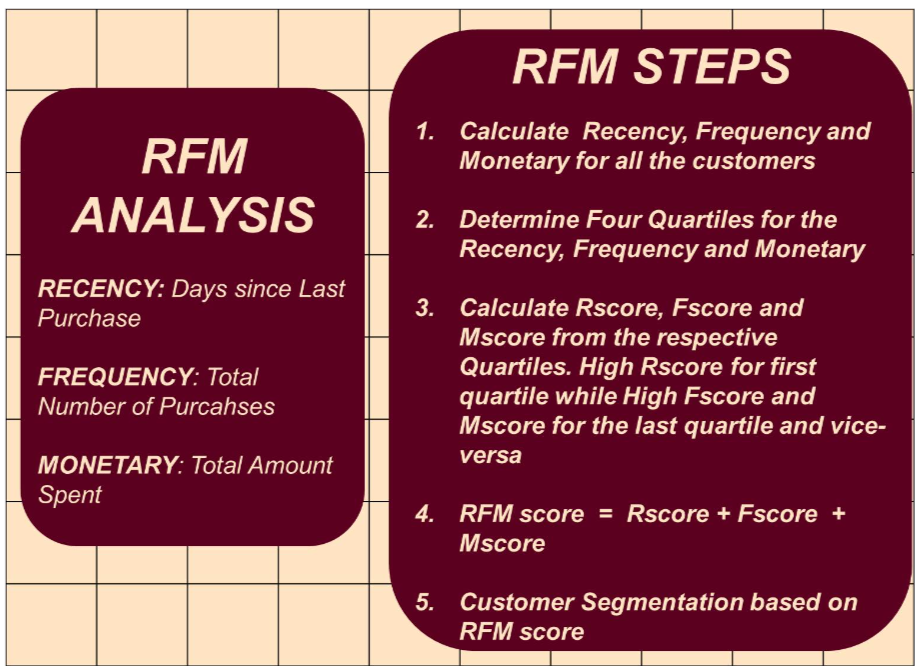

###Recency
To calculate the Recency we will follow the steps below:

Convert the Working Date column to datetime format
Set the reference date as the lastest date in the data
Filter out the most recent purchase date for each customer
Calculate the Recency by subtracting most recent purchase date from the reference date
Drop the most recent purchase date column

In [32]:
df2['Working Date'] = pd.to_datetime(df2['Working Date'])
ref_date = df2['Working Date'].max()
df2['Date'] = df2['Working Date'].apply(lambda x: x.date())
df2['Most_Recent_Purchase'] = df2.groupby('Customer ID')['Date'].transform(max)
df2['Recency'] = (ref_date.date() - df2.Most_Recent_Purchase).astype('timedelta64[D]')

In [33]:
df2 = df2.drop('Most_Recent_Purchase', axis=1)

###Frequency

In [34]:
df2['Frequency'] = df2.groupby('Customer ID')['increment_id'].transform('nunique')

###Monetary

In [36]:
df2['Monetary'] = df2.groupby('Customer ID')['grand_total'].transform(sum)

###RFM Table

In [37]:
RFM_df = df2[['Customer ID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()
RFM_df.head()

,Customer ID,Recency,Frequency,Monetary
0,1.00,788.00,1,"1,950.00"
3,4.00,1.00,229,"1,316,173.25"
6,7.00,500.00,4,105.00
7,6.00,788.00,1,170.00
10,9.00,788.00,1,"5,500.00"


###RFM Scores

In [38]:
RFM_quantiles = RFM_df[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.5, 0.75])

RFM_df.loc[(RFM_df['Recency'] <= RFM_quantiles.Recency[0.25]), 'Rscore'] = 4.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.25]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.5]), 'Rscore'] = 3.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.5]) & (RFM_df.Recency <= RFM_quantiles.Recency[0.75]), 'Rscore'] = 2.0
RFM_df.loc[(RFM_df['Recency'] > RFM_quantiles.Recency[0.75]), 'Rscore'] = 1.0

RFM_df.loc[(RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.25]), 'Fscore'] = 1.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.25]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.5]), 'Fscore'] = 2.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.5]) & (RFM_df['Frequency'] <= RFM_quantiles.Frequency[0.75]), 'Fscore'] = 3.0
RFM_df.loc[(RFM_df['Frequency'] > RFM_quantiles.Frequency[0.75]), 'Fscore'] = 4.0

RFM_df.loc[(RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.25]), 'Mscore'] = 1.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.25]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.5]), 'Mscore'] = 2.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.5]) & (RFM_df['Monetary'] <= RFM_quantiles.Monetary[0.75]), 'Mscore'] = 3.0
RFM_df.loc[(RFM_df['Monetary'] > RFM_quantiles.Monetary[0.75]), 'Mscore'] = 4.0

RFM_df['RFM_score'] = RFM_df.Rscore + RFM_df.Fscore + RFM_df.Mscore

###Customers Segmentations: RFM Score

In [39]:
RFM_df.loc[(RFM_df['RFM_score'] == 12.0), 'Cluster'] = 'Champions'
RFM_df.loc[(RFM_df['RFM_score'] == 11.0), 'Cluster'] = 'Loyal Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 9.0) & (RFM_df['RFM_score'] <= 10.0), 'Cluster'] = 'Promising Customers'
RFM_df.loc[(RFM_df['RFM_score'] >= 7.0) & (RFM_df['RFM_score'] <= 8.0), 'Cluster'] = 'At Risk'
RFM_df.loc[(RFM_df['RFM_score'] >= 4.0) & (RFM_df['RFM_score'] <= 6.0), 'Cluster'] = 'Hibernating'
RFM_df.loc[(RFM_df['RFM_score'] == 3.0), 'Cluster'] = 'Lost Customers'

###Interpretation of Clusters

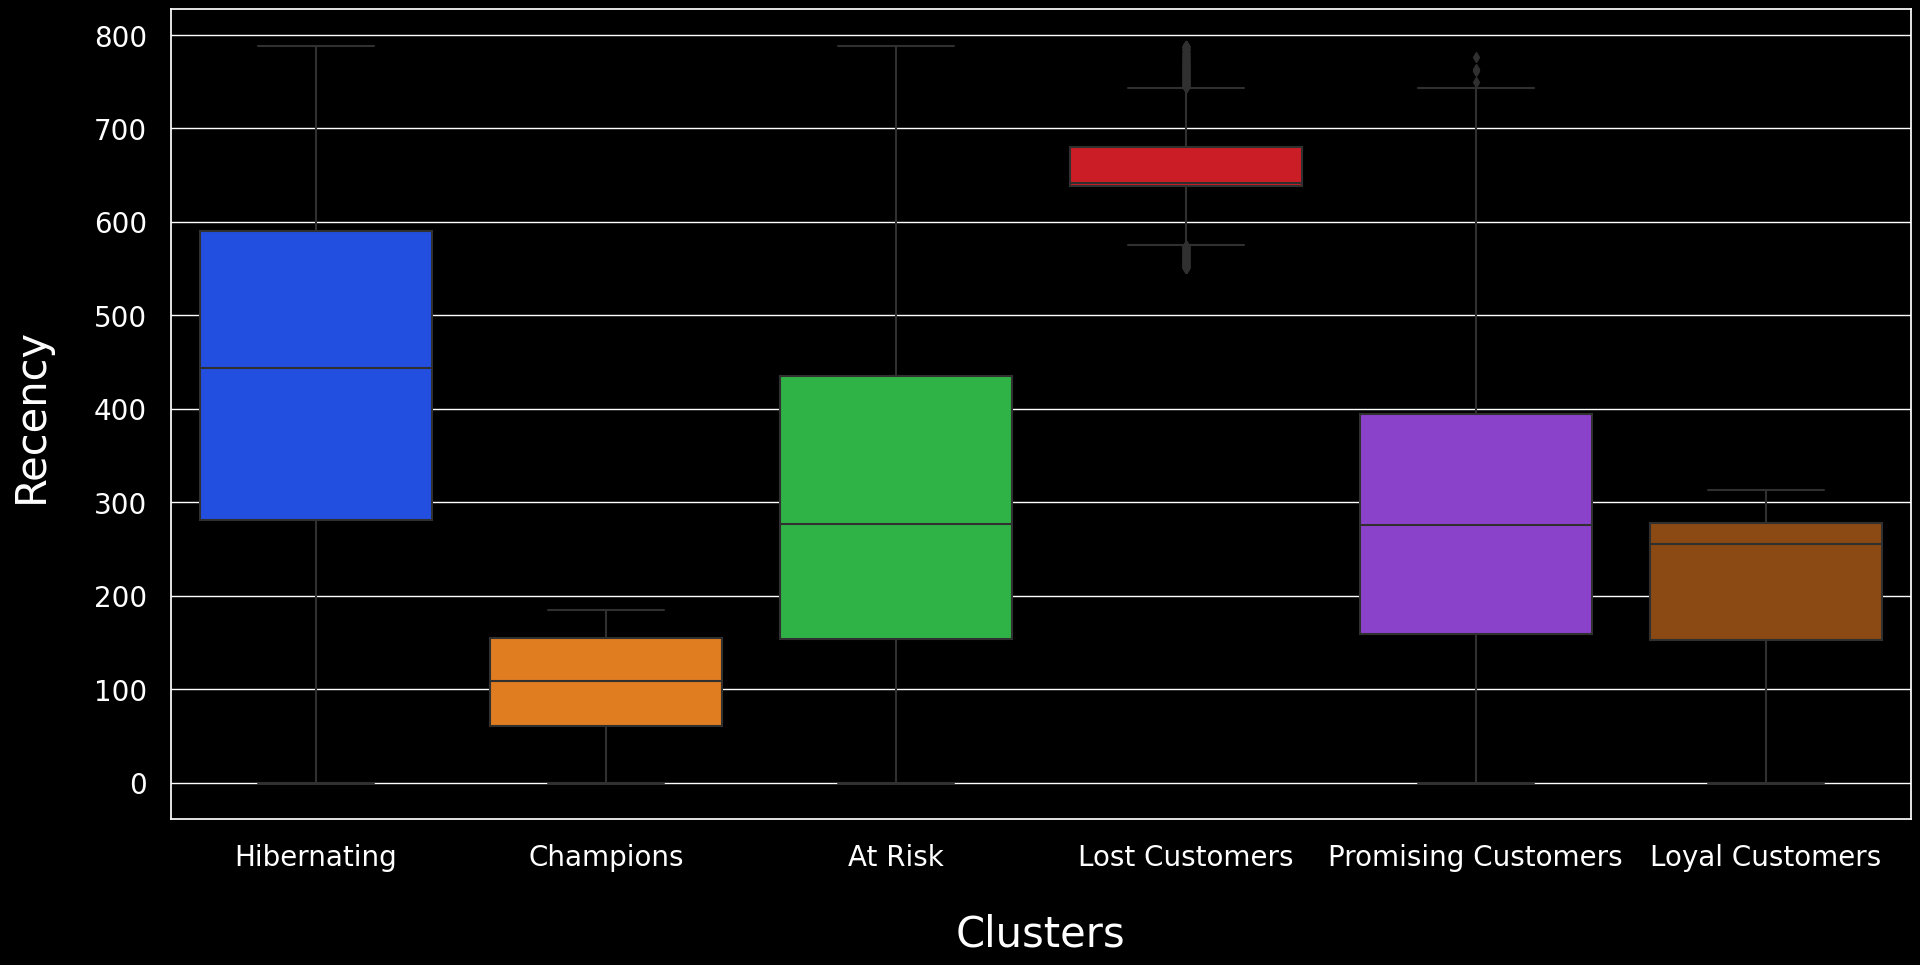

In [40]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(data=RFM_df, x='Cluster', y = 'Recency', palette='bright');
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=30, color='white')
plt.ylabel('Recency', fontsize=30, labelpad=30, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

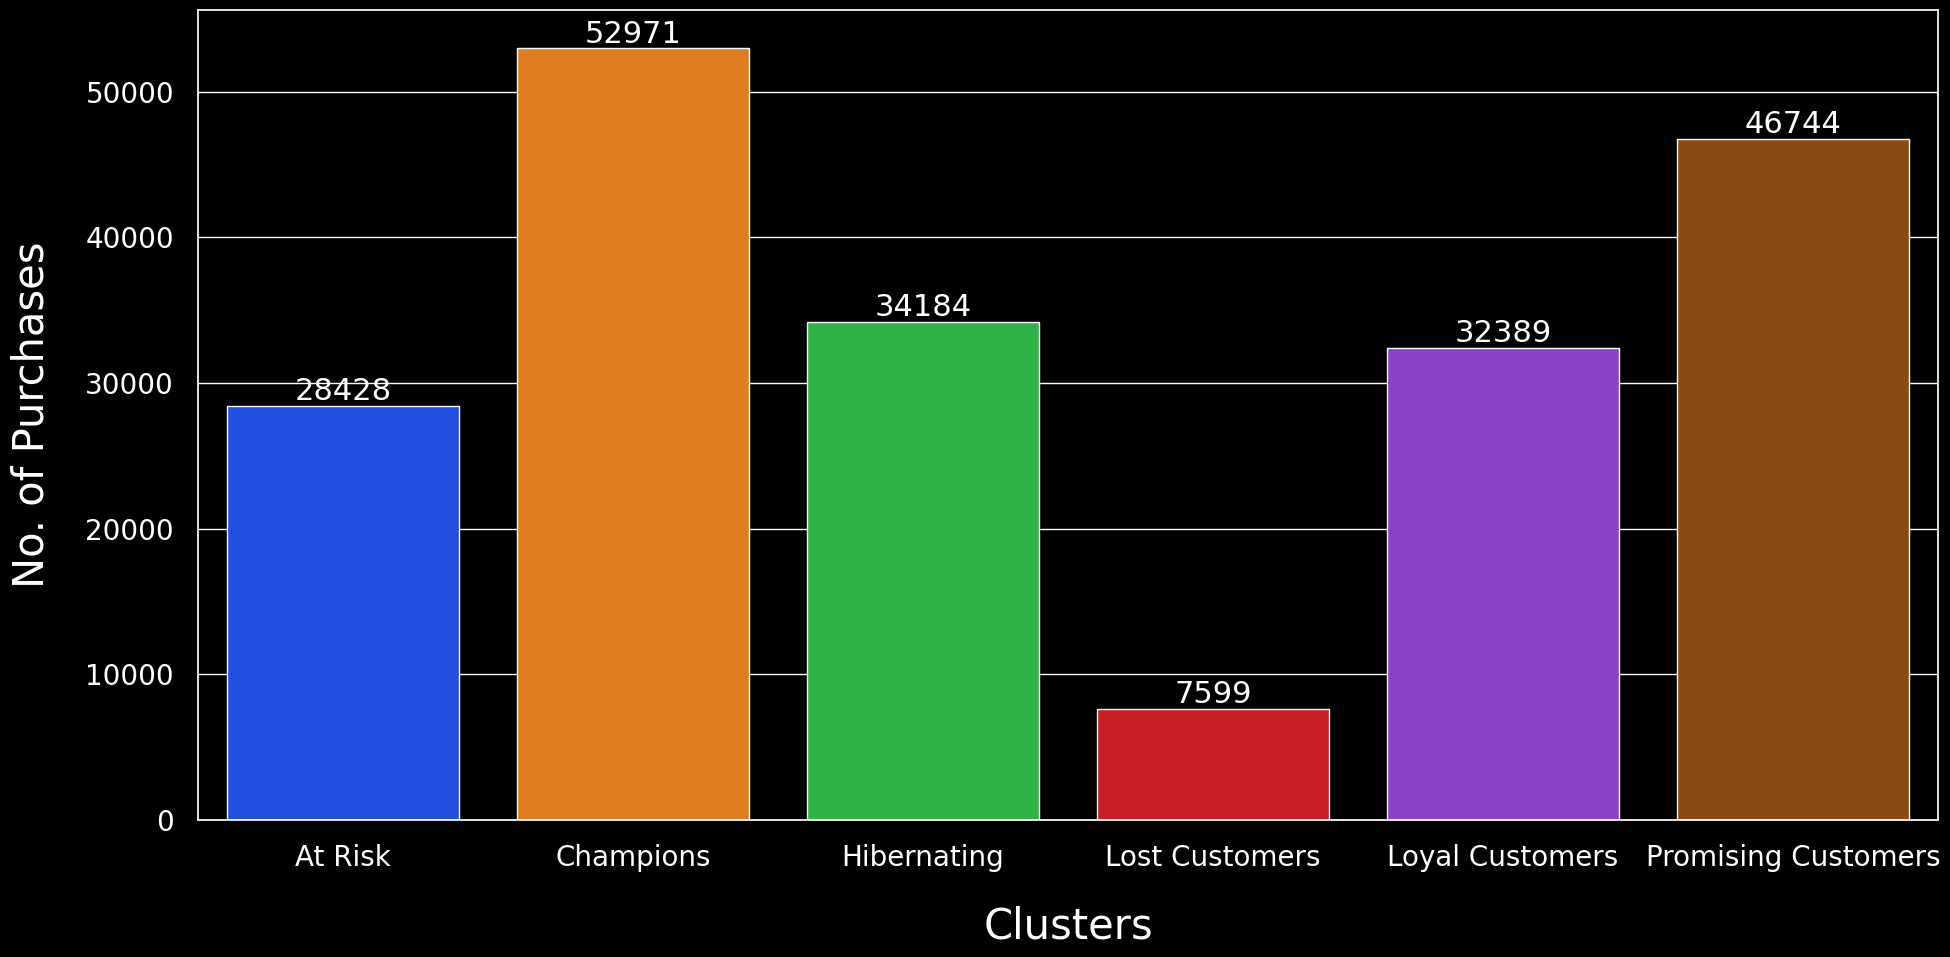

In [41]:
frequency = RFM_df.groupby('Cluster')['Frequency'].sum()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Number_of_Purchases'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Number_of_Purchases', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('No. of Purchases', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

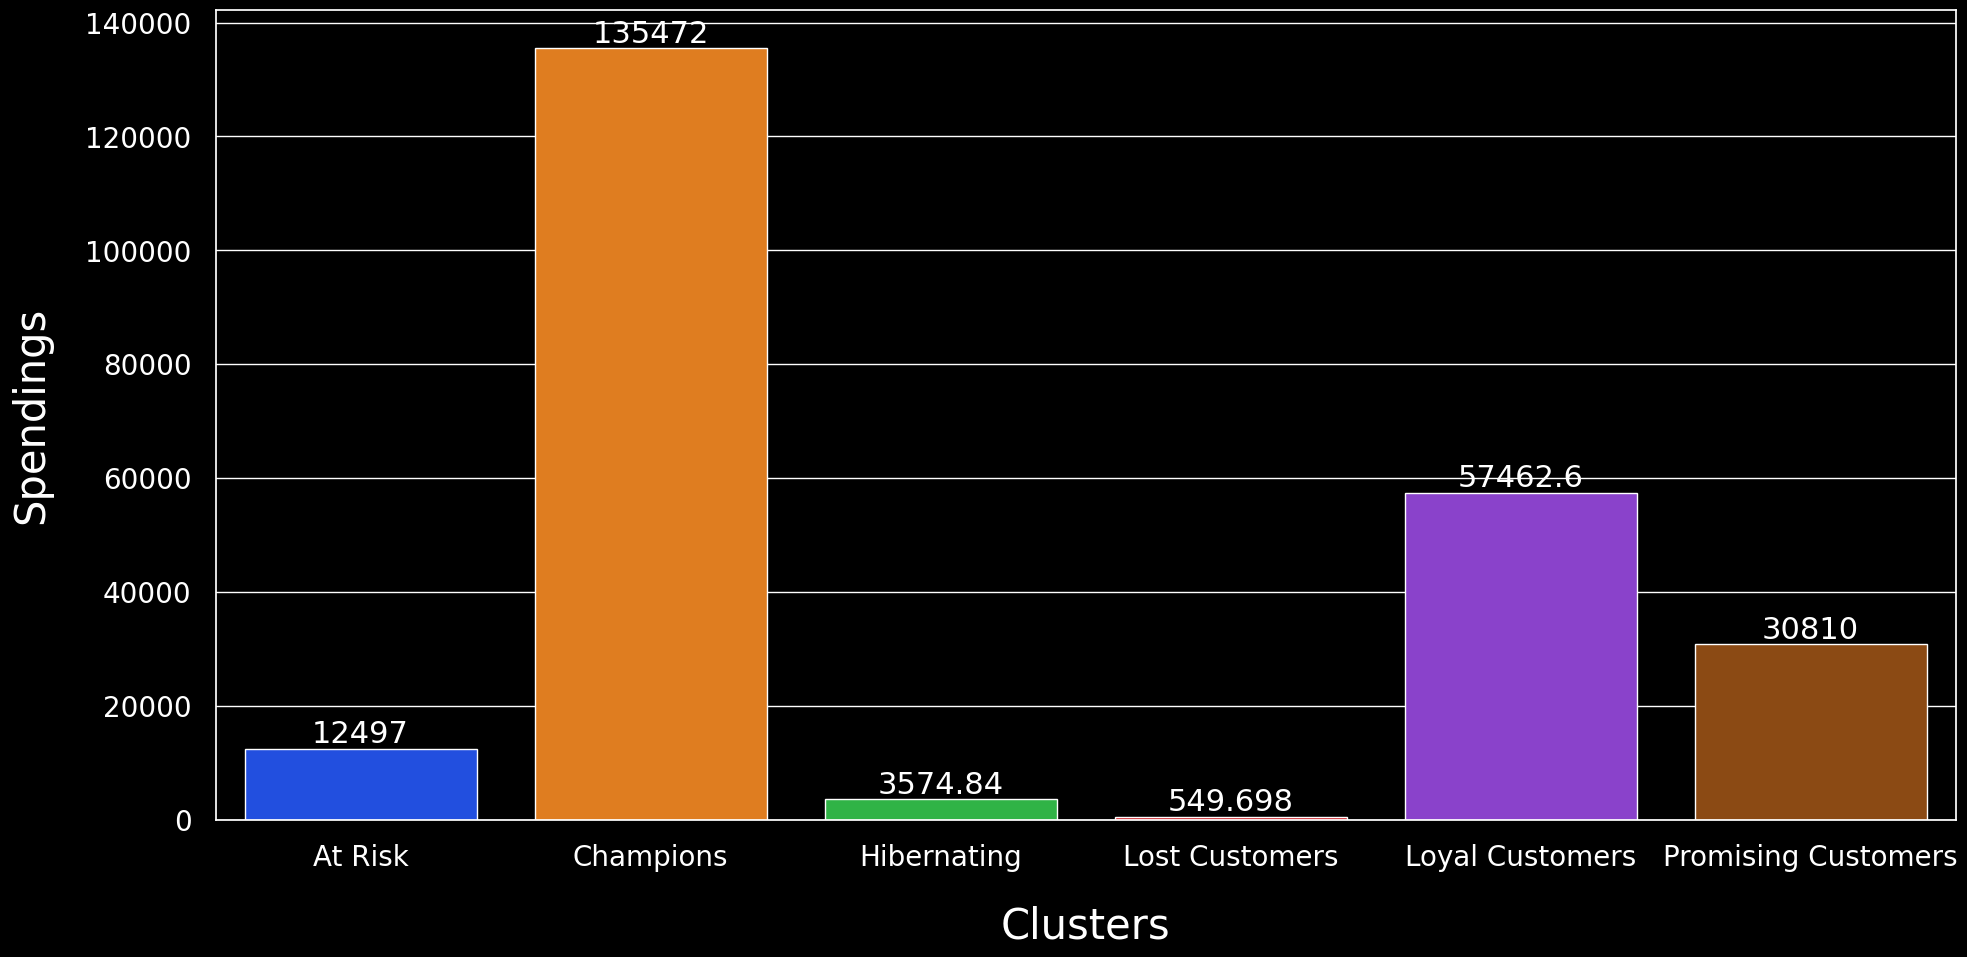

In [42]:
frequency = RFM_df.groupby('Cluster')['Monetary'].mean()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Spendings'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Spendings', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='white')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('Spendings', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

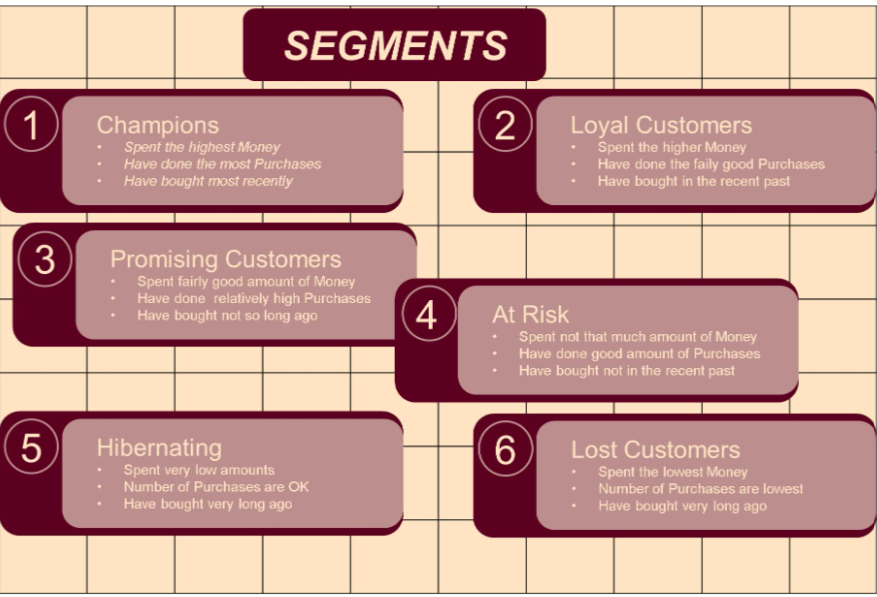

##EDA
Lets's map the clusters on the original data and perform exploratory data analysis to gain meaningful insights

In [45]:
cluster_mapping = pd.Series(RFM_df.Cluster.values, index=RFM_df['Customer ID']).to_dict()

df2['Cluster'] = df2['Customer ID'].map(cluster_mapping)

###Clusters distribution

In [46]:
cluster_counts = RFM_df.Cluster.value_counts()

cluster_counts_df = pd.DataFrame(list(cluster_counts.items()), columns=['Cluster', 'Number_of_Customers'])


fig = px.pie(cluster_counts_df,
             values = cluster_counts_df.Number_of_Customers,
             names = cluster_counts_df.Cluster,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

Insights:

Most of the customers are Hibernating or lie in the At Risk group i.e. 40% and 23% respectively
Promising, Loyal and Champion customers who spent the most money and made the most purchaseses, are jointly about 27% of total customers

###Famous Product Categories: Clusters Wise

In [48]:
fig = px.treemap(df2,
                 path=['Cluster','category_name_1'], template='plotly_dark', height=1000)
fig.update_traces(textfont_color='yellow', textfont_size=16, selector=dict(type='treemap'))
fig.show()

Insights:

Mobiles & Tablets are the most famous products among the Champions and Loyal customers
Men's fashion is the most selling category among the Promising, At Risk, Hibernating and Lost Customers
Mobiles & Tablets is the second best selling category among the Promising, At Risk, Hibernating and Lost customer groups
Appliances, Superstore and Women's Fashion are the other top selling categories

###Spending habits by clusters

In [49]:
cluster1 = df2[df2.Cluster == 'Champions'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster1.columns = ['Category', 'Grand_Total_Cluster1']

cluster2 = df2[df2.Cluster == 'Loyal Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster2.columns = ['Category', 'Grand_Total_Cluster2']

cluster3 = df2[df2.Cluster == 'Promising Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster3.columns = ['Category', 'Grand_Total_Cluster3']

cluster4 = df2[df2.Cluster == 'At Risk'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster4.columns = ['Category', 'Grand_Total_Cluster4']

cluster5 = df2[df2.Cluster == 'Hibernating'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster5.columns = ['Category', 'Grand_Total_Cluster5']

cluster6 = df2[df2.Cluster == 'Lost Customers'].groupby('category_name_1')['grand_total'].sum().to_frame().reset_index()
cluster6.columns = ['Category', 'Grand_Total_Cluster6']

merged = cluster1.merge(cluster2, how='left').merge(cluster3, how='left').merge(cluster4, how='left').merge(cluster5, how='left').merge(cluster6, how='left')

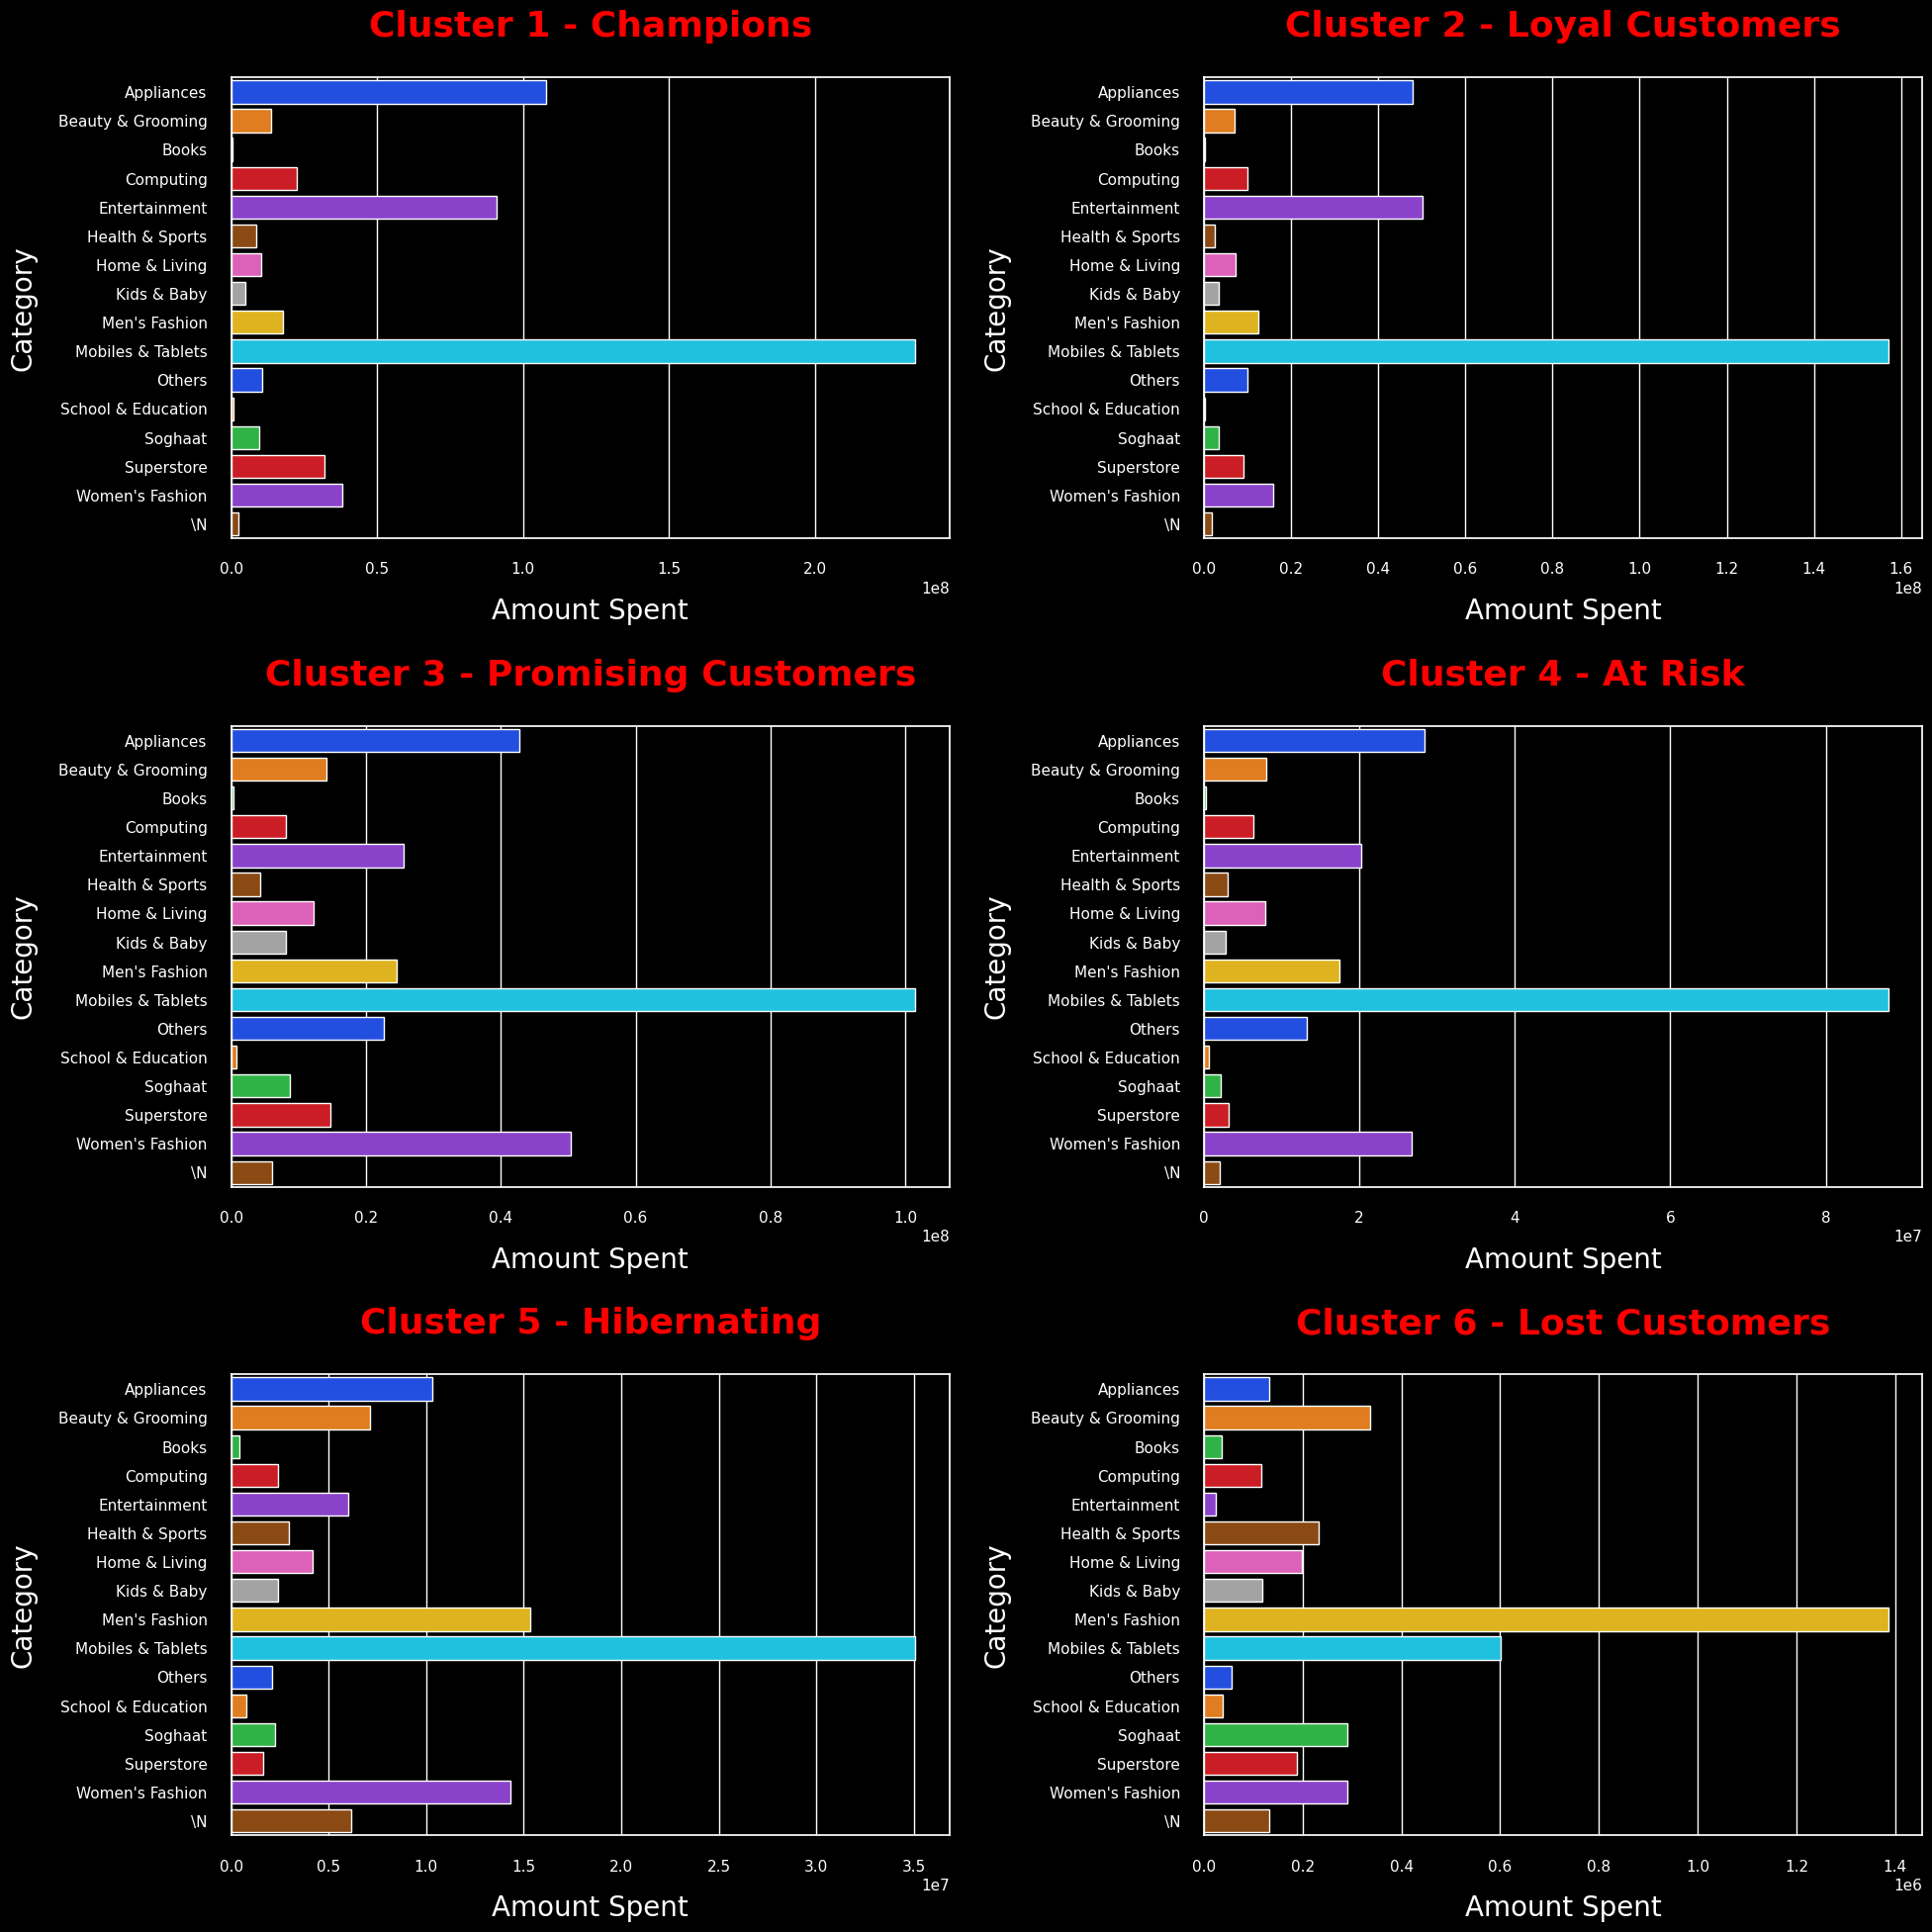

In [50]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})

fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.barplot(ax = ax[0,0], data = cluster1, y=cluster1.Category, x=cluster1.Grand_Total_Cluster1, palette= 'bright')
sns.barplot(ax = ax[0,1], data = cluster2, y=cluster2.Category, x=cluster2.Grand_Total_Cluster2, palette= 'bright')
sns.barplot(ax = ax[1,0], data = cluster3, y=cluster3.Category, x=cluster3.Grand_Total_Cluster3, palette= 'bright')
sns.barplot(ax = ax[1,1], data = cluster4, y=cluster4.Category, x=cluster4.Grand_Total_Cluster4, palette= 'bright')
sns.barplot(ax = ax[2,0], data = cluster5, y=cluster5.Category, x=cluster5.Grand_Total_Cluster5, palette= 'bright')
sns.barplot(ax = ax[2,1], data = cluster6, y=cluster6.Category, x=cluster6.Grand_Total_Cluster6, palette= 'bright')

ax[0,0].set_title("Cluster 1 - Champions", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='y', colors='white')

ax[0,1].set_title("Cluster 2 - Loyal Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,1].tick_params(axis='x', colors='white')
ax[0,1].tick_params(axis='y', colors='white')

ax[1,0].set_title("Cluster 3 - Promising Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,0].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='y', colors='white')

ax[1,1].set_title("Cluster 4 - At Risk", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='y', colors='white')

ax[2,0].set_title("Cluster 5 - Hibernating", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,0].tick_params(axis='x', colors='white')
ax[2,0].tick_params(axis='y', colors='white')

ax[2,1].set_title("Cluster 6 - Lost Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,1].tick_params(axis='x', colors='white')
ax[2,1].tick_params(axis='y', colors='white')

plt.tight_layout(pad=2);

Insights:

The two biggest spending groups, Champions and Loyal customers, spent most of their money on Mobiles & Tablets, Appliances and Entertainment
Fairly good spending groups, Promising and At Risk customers, spent money also on Men's and Women's Fashion apart from Mobile & Tablets, Appliances and Entertainment
Least spending clusters, Hibernatinga nd Lost customers, have spent more on Mobiles & Tablets and Men's Fashion

###Order Status by Clusters

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

completed_orders = df2[df2.status == 'Completed'].Cluster.value_counts().to_frame().reset_index()
completed_orders.columns = ['Cluster', 'Order_Counts']

pending_orders = df2[df2.status == 'Pending'].Cluster.value_counts().to_frame().reset_index()
pending_orders.columns = ['Cluster', 'Order_Counts']


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Completed Orders', 'Pending Orders'])

fig.add_trace(go.Pie(labels=completed_orders.Cluster, values=completed_orders.Order_Counts),1, 1)

fig.add_trace(go.Pie(labels=pending_orders.Cluster, values=pending_orders.Order_Counts),1, 2)


fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))

fig.update_layout(template='plotly_dark', height=600, width=1000)
fig.show()

Insights:

Champions, Loyal and Promising customers ordered the most

##Conclusion

1.   65% of customers placed only one order
2.   Products from only one category were ordered by 72% of customers

1.   About 45% of customers canceled their orders
2.   Half of the orders were canceled

1.   Among the different groups of customers, Champions, Loyal and Promising customers spent the highest amount of money, bought more frequently and in the near past
2.   40% of the customers fall in the Hibernating group

1.   Most famous product categories among all clusters are: Mobiles & Tablets, Men's Fashion, Women's Fashion, Superstores and Appliances
2.   Customers from the clusters spent most of their money on Mobiles & Tablets, Men's Fashion, Appliances, Entertainment and Women's Fashion

1.   Cash on delivery (cod), Payaxis, Easypay and Jazzwallet are the most famous payment methods among all the clusters










